<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S10_C5_Twitter_NGram_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re # regulare expression > expresiones regulares
from nltk.corpus import stopwords # grupos de ciertas caracteristicas
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Paso 1. Cargar Datos de drive



In [ ]:
from google.colab import drive # conectandonos con google drive
drive.mount('/content/drive')
import os # la libreria necesaria de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET') # es el codigo que nos permite ingresar la ruta de la carpeta para conectarme a drive

# muestra los archivos que hay en la ruta
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv',
 'generated_classification_data.csv',
 'Mall_Customers.csv',
 'Police-Crime.csv',
 'amazon_reviews.csv',
 'twitter.csv']

In [ ]:
# Cargar datos
data_tw = pd.read_csv('twitter.csv')
data_ama = pd.read_csv('amazon_reviews.csv')
data = data_tw
# Mostrar primeras filas
print(data_tw.head())

# label 0 = positive
# label 1 = negative

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [ ]:
data_tw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
data_tw.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
data_tw['label'].value_counts()

,count
label,
0,29720
1,2242


In [ ]:
data = data_tw.drop(['id'], axis=1)
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


#Cargar datos y limpiar

##[Expresiones regulares](https://support.google.com/analytics/answer/1034324?hl=es)

In [ ]:
# Limpiar texto
def clean_text(text):
  # Eliminar menciones
  # sub(patron(regular expression), texto de reempazo,texto imput)
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
  # Eliminar URLs
  text = re.sub(r'https\S+', ' ', text)
  # Eliminar URLs
  text = re.sub(r'www\S+', ' ', text)
  # Eliminar hashtags
  text = re.sub(r'#', ' ', text)
  # Eliminar caracteres especiales
  # Elimina todo lo que no es letras mayusculas o minusculas y dejar los apostrofes
  text = re.sub(r"[^A-Za-z']", ' ', text)
  # Convertir a minúsculas
  #convertir a minusculas lower(),eliminar nueva linea o tabulacion strip()
  text = text.lower().strip()
  return text

#h = data['tweet'].apply(clean_text)
#print(h.head(5))
data['clean_tweet'] = data['tweet'].apply(clean_text)
print(data['clean_tweet'].head(5))



0    when a father is dysfunctional and is so selfi...
1    thanks for  lyft credit i can't use cause they...
2                                  bihday your majesty
3      model   i love u take with u all the time in ur
4               factsguide  society now     motivation
Name: clean_tweet, dtype: object


# Paso 2. Tokenizacion y elminicación de stop words

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

set = unique
es para listar las palabras unicas

In [ ]:
# Cargar las stopwords en ingles
stop_words = set(stopwords.words('english'))
# stopwords = conectores
# Tokens
def tokenize_text(text):
  # Tokenizar
  tokens = word_tokenize(text)
  # Eliminar stopwords
  tokens = [token for token in tokens if token not in stop_words]
  return tokens

data['tokens'] = data['clean_tweet'].apply(tokenize_text)
print(data['tokens'].head(10))

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, ca, n't, use, cause, n'...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talking, leave, chaos, ...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, ca, n't, thi...
8    [love, land, allin, cavs, champions, cleveland...
9                                [welcome, 'm, 's, gr]
Name: tokens, dtype: object


In [ ]:
print(data['clean_tweet'].head(10))

0    when a father is dysfunctional and is so selfi...
1    thanks for  lyft credit i can't use cause they...
2                                  bihday your majesty
3      model   i love u take with u all the time in ur
4               factsguide  society now     motivation
5    huge fan fare and big talking before they leav...
6                 camping tomorrow               danny
7    the next school year is the year for exams    ...
8    we won    love the land     allin  cavs  champ...
9                    welcome here    i'm   it's so  gr
Name: clean_tweet, dtype: object


# Paso 3. N-gram

In [ ]:
# Crear N-grams y contar su frecuencia
    # data['tokens'] = es el conjunto de tokens
    # tokens => [welcome, 'm, 's, gr8]
    # token/word => welcome
all_word = [token for tokens in data['tokens'] for token in tokens]

#freq_dist = FreqDist(all_word)
freq_dist = nltk.FreqDist(all_word)
freq_dist.most_common(10)



[("'s", 3227),
 ('love', 2828),
 ('day', 2383),
 ("n't", 2232),
 ('amp', 1777),
 ('happy', 1698),
 ('u', 1194),
 ('like', 1180),
 ('life', 1176),
 ('time', 1150)]

In [ ]:
unigrams = ngrams(all_word, 1)
bigrams = ngrams(all_word, 2)
trigrams = ngrams(all_word, 3)

In [ ]:
fdist_unigrams = nltk.FreqDist(unigrams)
fdist_bigrams = nltk.FreqDist(bigrams)
fdist_trigrams = nltk.FreqDist(trigrams)

In [ ]:
fdist_unigrams.most_common(5)

[(("'s",), 3227),
 (('love',), 2828),
 (('day',), 2383),
 (("n't",), 2232),
 (('amp',), 1777)]

In [ ]:
fdist_bigrams.most_common(5)

[(('ca', "n't"), 747),
 (("'s", 'day'), 444),
 (('thankful', 'positive'), 429),
 (('father', "'s"), 424),
 (('positive', 'affirmation'), 352)]

In [ ]:
fdist_trigrams.most_common(5)

[(('father', "'s", 'day'), 403),
 (('model', 'love', 'u'), 325),
 (('love', 'u', 'take'), 325),
 (('u', 'take', 'u'), 325),
 (('take', 'u', 'time'), 325)]

In [ ]:
def apariciones(fdist):
  fdist.most_common(10)
  plt.figure(figsize=(8,2))
  fdist.plot(30, cumulative=False)
  return plt.show()

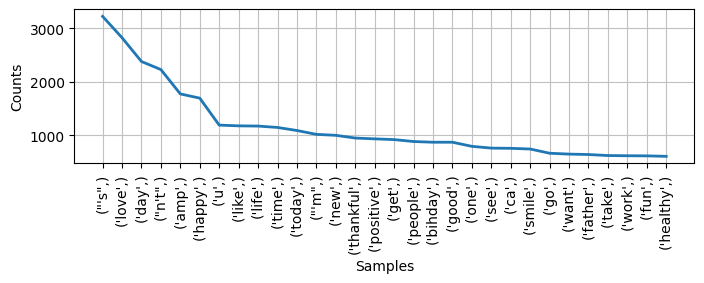

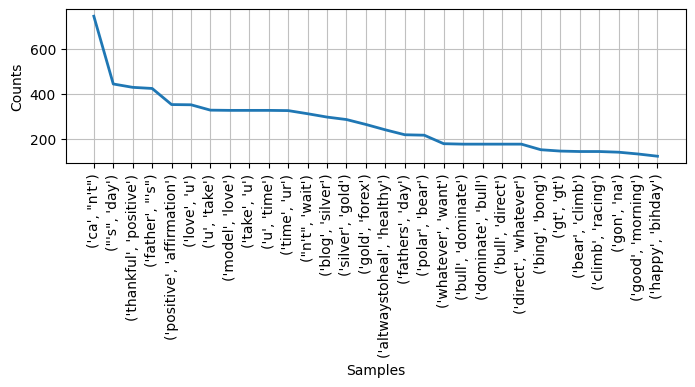

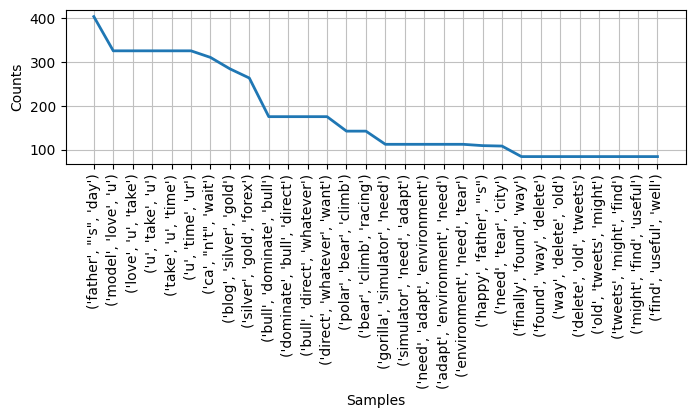

In [ ]:
apariciones(fdist_unigrams)
apariciones(fdist_bigrams)
apariciones(fdist_trigrams)




```
# This is formatted as code
```

# Paso 4. Colocación (Collocations)

In [ ]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [ ]:
finder = BigramCollocationFinder.from_words(all_word)
finder.apply_freq_filter(200) # descarta todos los bigrams cuya frecuencia de aparición sea menor que

In [ ]:
collocations = finder.nbest(BigramAssocMeasures.pmi, 10)
collocations

[('polar', 'bear'),
 ('gold', 'forex'),
 ('silver', 'gold'),
 ('blog', 'silver'),
 ('altwaystoheal', 'healthy'),
 ('positive', 'affirmation'),
 ('time', 'ur'),
 ('thankful', 'positive'),
 ('ca', "n't"),
 ('u', 'take')]

¿ Cómo eliminamos los términos irrelevantes?

In [ ]:
# Crear N-grams y contar su frecuencia
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)


# Unigrams, bigrams y trigrams
all_tokens = [token for tokens in data['tokens'] for token in tokens]
unigrams = generate_ngrams(all_tokens, 1)
bigrams = generate_ngrams(all_tokens, 2)
trigrams = generate_ngrams(all_tokens, 3)

# Mostrar los 10 más frecuentes
print("Top 10 Unigrams:", unigrams.most_common(10))
print("Top 10 Bigrams:", bigrams.most_common(10))
print("Top 10 Trigrams:", trigrams.most_common(10))

Top 10 Unigrams: [(("'s",), 3227), (('love',), 2828), (('day',), 2383), (("n't",), 2232), (('amp',), 1777), (('happy',), 1698), (('u',), 1194), (('like',), 1180), (('life',), 1176), (('time',), 1150)]
Top 10 Bigrams: [(('ca', "n't"), 747), (("'s", 'day'), 444), (('thankful', 'positive'), 429), (('father', "'s"), 424), (('positive', 'affirmation'), 352), (('love', 'u'), 351), (('u', 'take'), 327), (('model', 'love'), 326), (('take', 'u'), 326), (('u', 'time'), 326)]
Top 10 Trigrams: [(('father', "'s", 'day'), 403), (('model', 'love', 'u'), 325), (('love', 'u', 'take'), 325), (('u', 'take', 'u'), 325), (('take', 'u', 'time'), 325), (('u', 'time', 'ur'), 325), (('ca', "n't", 'wait'), 310), (('blog', 'silver', 'gold'), 284), (('silver', 'gold', 'forex'), 263), (('bull', 'dominate', 'bull'), 175)]


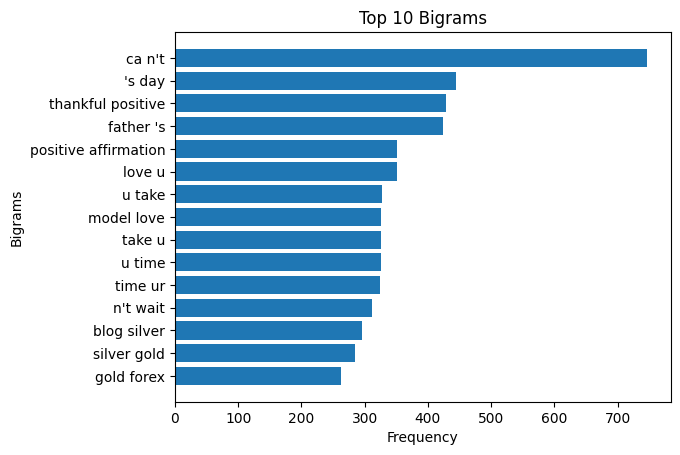

In [ ]:
bigrams_freq = bigrams.most_common(15)
bigram_words, bigram_counts = zip(*bigrams_freq)

plt.barh([' '.join(bigram) for bigram in bigram_words], bigram_counts)
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Bigrams")
plt.gca().invert_yaxis()
plt.show()

# Paso 4. Collocations

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Encontrar colocaciones usando Bigram Collocation Finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)

# Filtrar bigramas que aparecen menos de 3 veces
finder.apply_freq_filter(200)

# Calcular métricas de colocación
collocations = finder.nbest(bigram_measures.pmi, 100)
print("Top 10 Collocations (PMI):", collocations)

Top 10 Collocations (PMI): [('polar', 'bear'), ('gold', 'forex'), ('silver', 'gold'), ('blog', 'silver'), ('altwaystoheal', 'healthy'), ('positive', 'affirmation'), ('time', 'ur'), ('thankful', 'positive'), ('ca', "n't"), ('u', 'take'), ('take', 'u'), ('model', 'love'), ('fathers', 'day'), ("n't", 'wait'), ('u', 'time'), ('father', "'s"), ('love', 'u'), ("'s", 'day')]


una validacion de palabras corpus tipicas en ingles

In [ ]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no lo has hecho
nltk.download('stopwords')
nltk.download('words')

# Lista de palabras comunes en inglés
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

# Filtrar nombres propios y palabras no reconocidas
def is_valid_word(word):
    return word in english_vocab

data['filtered_tokens'] = data['tokens'].apply(lambda tokens: [word for word in tokens if is_valid_word(word)])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def clean_tokens(tokens):
    return [word for word in tokens if not word.startswith(('@', '#'))]

data['filtered_tokens'] = data['filtered_tokens'].apply(clean_tokens)


In [ ]:
# Contar frecuencia de todas las palabras
from collections import Counter

all_words = [word for tokens in data['filtered_tokens'] for word in tokens]
word_counts = Counter(all_words)

# Filtrar palabras con frecuencia mayor a un umbral (por ejemplo, 3)
def filter_low_freq(tokens, min_freq=10):
    return [word for word in tokens if word_counts[word] >= min_freq]

data['filtered_tokens'] = data['filtered_tokens'].apply(lambda tokens: filter_low_freq(tokens))



In [ ]:
data['filtered_tokens']

,filtered_tokens
0,"[father, selfish, kids, dysfunction, run]"
1,"[thanks, credit, ca, use, cause, offer]"
2,[majesty]
3,"[model, love, u, take, u, time, ur]"
4,"[society, motivation]"
...,...
31957,[ate]
31958,"[see, nina, turner, trying, wrap, genuine, her..."
31959,"[listening, sad, monday, morning, work, sad]"
31960,"[sikh, temple, act]"


In [ ]:
from nltk.util import ngrams
from collections import Counter

# Recalcular bigrams
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)

all_filtered_tokens = [token for tokens in data['filtered_tokens'] for token in tokens]
bigrams_filtered = generate_ngrams(all_filtered_tokens, 2)

# Mostrar los 10 bigrams más frecuentes
print("Top 10 Bigrams (Filtrados):", bigrams_filtered.most_common(10))




Top 10 Bigrams (Filtrados): [(('father', 'day'), 447), (('thankful', 'positive'), 429), (('love', 'u'), 352), (('positive', 'affirmation'), 352), (('u', 'take'), 327), (('model', 'love'), 326), (('take', 'u'), 326), (('u', 'time'), 326), (('time', 'ur'), 325), (('ca', 'wait'), 315)]


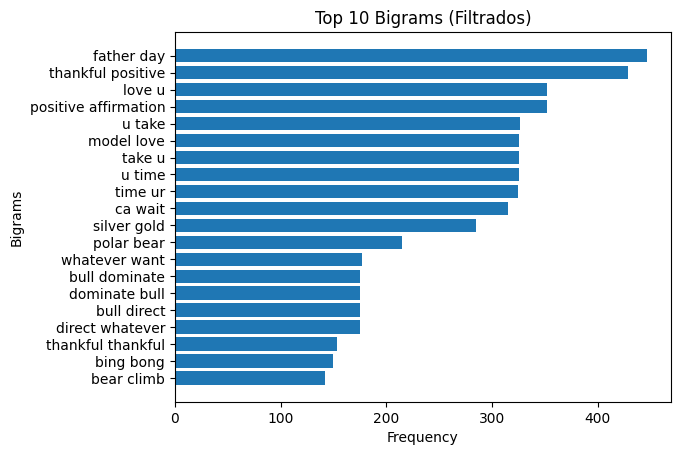

In [ ]:
# Visualizar bigrams más frecuentes después de filtrado
bigrams_freq_filtered = bigrams_filtered.most_common(20)
bigram_words_filtered, bigram_counts_filtered = zip(*bigrams_freq_filtered)

plt.barh([' '.join(bigram) for bigram in bigram_words_filtered], bigram_counts_filtered)
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 10 Bigrams (Filtrados)")
plt.gca().invert_yaxis()
plt.show()

# Paso 4. Collocations

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [ ]:
# Encontrar colocaciones usando Bigram Collocation finder
bigram_mesure = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)
# filtrar bigramas que aparecen menos de 3
finder.apply_freq_filter(200)

collocations = finder.nbest(bigram_mesure.pmi, 100)
print("Top 10 Collocations (PMI):", collocations)

Top 10 Collocations (PMI): [('polar', 'bear'), ('gold', 'forex'), ('silver', 'gold'), ('blog', 'silver'), ('altwaystoheal', 'healthy'), ('positive', 'affirmation'), ('time', 'ur'), ('thankful', 'positive'), ('ca', "n't"), ('u', 'take'), ('take', 'u'), ('model', 'love'), ('fathers', 'day'), ("n't", 'wait'), ('u', 'time'), ('father', "'s"), ('love', 'u'), ("'s", 'day')]
